<a href="https://colab.research.google.com/github/larico1599/prediccion/blob/master/Preproseamiento_de_datos_Juliaca_10kv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
#import seaborn as sns
import seaborn as sbn

#sns.set()

##1.Creando Dataframes

In [4]:
#Frame 01
df_1 = pd.read_excel('./juliaca_10kv.xlsx', index_col=0, parse_dates=True)
df_1 = df_1.rename(columns={"MW-H":"consumo"})
df_1 = df_1.asfreq("15min")

df_1

,consumo
FECHA,
2018-01-01 00:00:00,4.95
2018-01-01 00:15:00,4.95
2018-01-01 00:30:00,4.91
2018-01-01 00:45:00,4.78
2018-01-01 01:00:00,4.51
...,...
2021-08-31 22:45:00,4.06
2021-08-31 23:00:00,3.75
2021-08-31 23:15:00,3.48


In [5]:
#verificando que no exitan NA
df_1.isna().sum()

consumo    0
dtype: int64

In [6]:
df_1.dtypes

consumo    float64
dtype: object

In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128544 entries, 2018-01-01 00:00:00 to 2021-08-31 23:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   consumo  128544 non-null  float64
dtypes: float64(1)
memory usage: 2.0 MB


In [8]:
# Frame 2
# copia de df_1
df_2= df_1.copy()

# Separar día y hora
df_2['fecha'] = df_2.index.normalize()
df_2['hora'] = df_2.index.time.astype(str)
df_2

,consumo,fecha,hora
FECHA,,,
2018-01-01 00:00:00,4.95,2018-01-01,00:00:00
2018-01-01 00:15:00,4.95,2018-01-01,00:15:00
2018-01-01 00:30:00,4.91,2018-01-01,00:30:00
2018-01-01 00:45:00,4.78,2018-01-01,00:45:00
2018-01-01 01:00:00,4.51,2018-01-01,01:00:00
...,...,...,...
2021-08-31 22:45:00,4.06,2021-08-31,22:45:00
2021-08-31 23:00:00,3.75,2021-08-31,23:00:00
2021-08-31 23:15:00,3.48,2021-08-31,23:15:00


In [9]:
#Transformando del Dataframe
df_pivot = df_2.pivot(index='fecha', columns='hora', values='consumo')
df_pivot

hora,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,02:30:00,02:45:00,03:00:00,03:15:00,03:30:00,03:45:00,04:00:00,04:15:00,04:30:00,04:45:00,05:00:00,05:15:00,05:30:00,05:45:00,06:00:00,06:15:00,06:30:00,06:45:00,07:00:00,07:15:00,07:30:00,07:45:00,08:00:00,08:15:00,08:30:00,08:45:00,09:00:00,09:15:00,09:30:00,09:45:00,...,14:00:00,14:15:00,14:30:00,14:45:00,15:00:00,15:15:00,15:30:00,15:45:00,16:00:00,16:15:00,16:30:00,16:45:00,17:00:00,17:15:00,17:30:00,17:45:00,18:00:00,18:15:00,18:30:00,18:45:00,19:00:00,19:15:00,19:30:00,19:45:00,20:00:00,20:15:00,20:30:00,20:45:00,21:00:00,21:15:00,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,4.95,4.95,4.91,4.78,4.51,4.24,3.94,3.59,3.32,3.11,2.96,2.85,2.76,2.69,2.66,2.65,2.64,2.63,2.64,2.64,2.67,2.66,2.53,2.10,2.09,2.13,2.20,2.26,2.33,2.41,2.47,2.52,2.57,2.60,2.63,2.67,2.69,2.73,2.77,2.79,...,2.60,2.60,2.60,2.60,2.59,2.58,2.57,2.57,2.55,2.54,2.55,2.59,2.65,2.89,3.19,3.49,3.90,4.43,4.76,4.53,4.94,5.11,5.19,5.18,5.15,5.08,4.97,4.83,4.72,4.54,4.41,4.26,4.08,3.85,3.65,3.51,3.35,3.20,3.05,2.93
2018-01-02,2.82,2.70,2.56,2.51,2.46,2.41,2.38,2.36,2.33,2.30,2.27,2.25,2.25,2.26,2.29,2.28,2.29,2.31,2.33,2.37,2.44,2.43,2.25,2.02,2.08,2.21,2.33,2.47,2.57,2.67,2.76,2.82,2.92,2.98,3.11,3.21,3.27,3.34,3.40,3.42,...,3.39,3.48,3.57,3.61,3.66,3.76,3.84,3.88,3.87,3.91,3.95,3.97,4.00,4.12,4.36,4.57,4.73,5.11,5.61,5.84,5.96,6.04,6.07,6.09,6.05,5.99,5.85,5.68,5.51,5.31,5.10,4.76,4.47,4.19,3.92,3.68,3.46,3.21,3.00,2.84
2018-01-03,2.69,2.57,2.49,2.43,2.35,2.30,2.27,2.23,2.21,2.19,2.17,2.16,2.15,2.15,2.17,2.21,2.24,2.28,2.33,2.39,2.45,2.51,2.40,2.20,2.27,2.40,2.57,2.70,2.82,2.88,2.96,3.07,3.13,3.23,3.34,3.46,3.58,3.59,3.66,3.71,...,3.65,3.72,3.75,3.81,3.89,3.96,4.01,4.00,4.05,4.11,4.19,4.24,4.25,4.30,4.38,4.57,4.90,5.22,5.74,6.07,6.26,6.38,6.37,6.31,6.24,6.14,6.00,5.85,5.72,5.42,5.19,4.89,4.55,4.26,3.95,3.71,3.44,3.19,2.95,2.81
2018-01-04,2.68,2.59,2.46,2.38,2.32,2.27,2.24,2.22,2.20,2.18,2.18,2.17,2.17,2.17,2.21,2.22,2.26,2.31,2.36,2.39,2.45,2.53,2.56,2.35,2.31,2.43,2.62,2.79,2.91,2.99,3.10,3.19,3.28,3.40,3.53,3.64,3.71,3.79,3.84,3.87,...,3.82,3.87,3.94,4.05,4.09,4.11,4.06,4.06,4.09,4.10,4.11,4.05,4.06,4.10,4.11,4.15,4.26,4.56,5.28,5.88,6.12,6.21,6.26,6.26,6.24,6.17,6.04,5.93,5.77,5.51,5.27,4.97,4.65,4.34,4.01,3.68,3.42,3.17,2.96,2.78
2018-01-05,2.62,2.51,2.42,2.34,2.27,2.23,2.18,2.14,2.11,2.09,2.08,2.08,2.08,2.09,2.13,2.16,2.19,2.22,2.24,2.35,2.43,2.46,2.17,2.16,2.34,2.48,2.67,2.82,2.92,3.00,3.08,3.16,3.22,3.27,3.43,3.57,3.65,3.72,3.78,3.79,...,3.54,3.61,3.69,3.80,3.86,3.86,3.87,3.88,3.92,3.92,3.89,3.98,4.07,4.10,4.14,4.21,4.41,4.83,5.50,5.79,6.01,6.14,6.17,6.16,6.11,6.03,5.90,5.77,5.63,5.42,5.13,4.84,4.55,4.25,3.94,3.66,3.41,3.22,3.05,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,2.95,2.83,2.72,2.62,2.55,2.50,2.48,2.43,2.40,2.39,2.38,2.37,2.36,2.36,2.39,2.42,2.43,2.45,2.49,2.54,2.59,2.65,2.73,2.82,2.77,2.64,2.74,2.88,3.02,3.18,3.35,3.40,3.51,3.62,3.85,4.09,4.28,4.41,4.46,4.54,...,4.38,4.46,4.53,4.56,4.60,4.59,4.61,4.63,4.67,4.66,4.72,4.86,4.94,4.94,5.10,5.44,5.93,6.32,6.43,6.53,6.55,6.53,6.49,6.42,6.32,6.23,6.13,6.00,5.85,5.67,5.47,5.26,4.98,4.70,4.43,4.15,3.82,3.57,3.37,3.19
2021-08-28,3.04,2.88,2.79,2.69,2.61,2.57,2.52,2.48,2.45,2.43,2.40,2.42,2.40,2.41,2.44,2.45,2.47,2.50,2.53,2.58,2.65,2.69,2.77,2.83,2.71,2.56,2.65,2.82,2.97,3.08,3.22,3.28,3.43,3.51,3.66,3.77,3.95,4.09,4.24,4.25,...,3.88,3.95,3.96,3.96,3.97,3.97,4.00,4.00,4.03,4.07,4.06,4.12,4.13,4.17,4.36,4.94,5.55,5.82,6.00,6.08,6.12,6.13,6.10,6.04,5.91,5.85,5.78,5.64,5.50,5.35,5

##2.Visualizando Datos

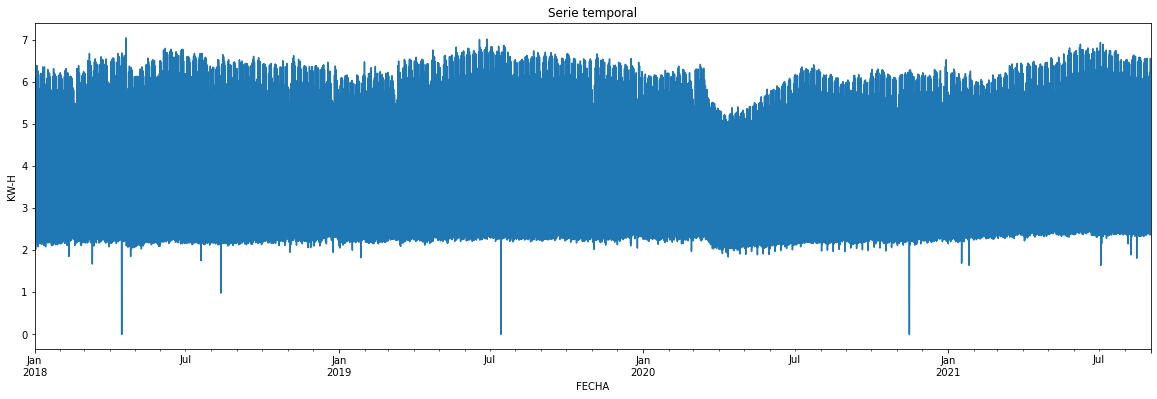

In [10]:
# Plot 
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

#df_1.loc["2020-03-01":"2020-05-30"].plot(ax=ax, color='C0', legend=None)
df_1.plot(ax=ax, color='C0', legend=None)
#ax.set_ylim(17.75, 22)
ax.set_ylabel('KW-H')
ax.set_title('Serie temporal');

Se puede observar la presencia de valores atípicos, se procedera a realizar otro tipo de grafica para observar mejor el comportamiento de la serie temporal

###2.1 Visualizando patrones

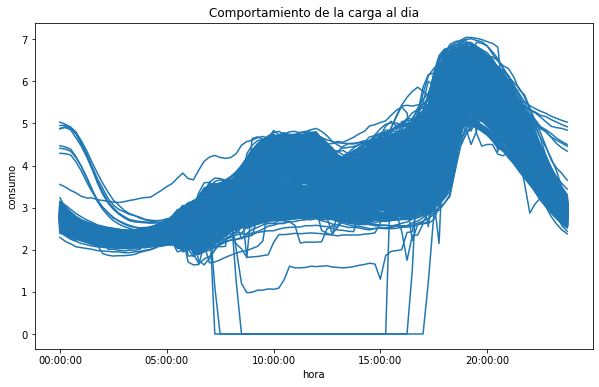

In [11]:
#Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
df_pivot.T.plot(ax=ax, color='C0', legend=False)
#ax.set_xlim([0, 47])
#ax.set_ylim(17.75, 22)
ax.set_ylabel('consumo')
ax.set_title('Comportamiento de la carga al dia');

Se observa mejor el comportamiento diario de la carga, a su ves se puede observar mejor la presencia de valores atípicos, para poder observar mejor los patrones se realizara un grafico de transparencia.

Text(0.5, 1.0, 'Comportamiento de la carga')

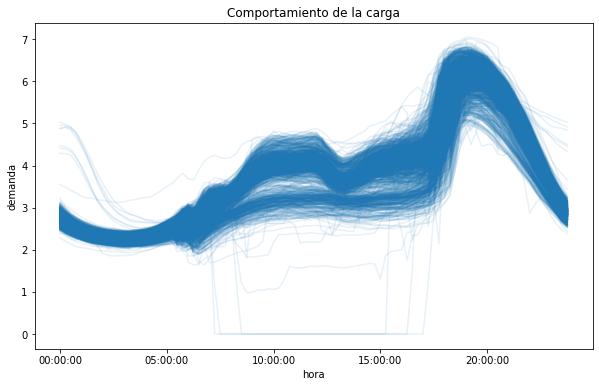

In [12]:
# Plot con transparencia
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

df_pivot.T.plot(ax=ax, color='C0', alpha=0.1, legend=False) #alpha: Nivel de transparencia
#ax.set_xlim([0, 47])
#ax.set_ylim(17.75, 22)
ax.set_ylabel('demanda')
ax.set_title('Comportamiento de la carga')

El gráfico de transparencia nos da un mejor panorama sobre de la serie temporal, podemos observar mejor el comportamiento de la carga evidenciando de mejor manera los valores atípicos los cuales tienen menor transparencia.

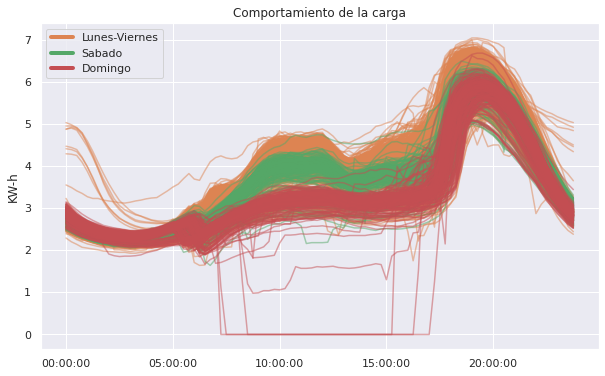

In [89]:
day_colors = { 'Monday': 'C1', 
               'Tuesday': 'C1',
               'Wednesday':'C1',
               'Thursday':'C1',
               'Friday':'C1',
               'Saturday':'C2',
               'Sunday':'C3',
               }

df_roll = pd.DataFrame(index=df_pivot.index, 
                       columns=np.roll(df_pivot.columns, 0), 
                       data=np.roll(df_pivot.values, 0))
# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for day_name, color in day_colors.items():
    # NOTE: we are plotting the transposed DataFrame
    df_roll[df_roll.index.day_name() == day_name].T.plot(
        ax=ax, color=color, alpha=0.5, legend=None)

#ax.set_xlim([0, 47])
#ax.set_ylim(17.75, 22)
ax.set_ylabel('KW-h')
ax.set_title('Comportamiento de la carga');

# Leyenda:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='C1', lw=4),
                Line2D([0], [0], color='C2', lw=4),
                Line2D([0], [0], color='C3', lw=4),   
                ]

ax.legend(custom_lines, ['Lunes-Viernes',"Sabado","Domingo"]);

Se puede observar como cambia el comportamiento de la demanda de pendiendo el dia de la semana

---



Text(0.5, 1.0, 'Histograma del comportamiento de la carga')

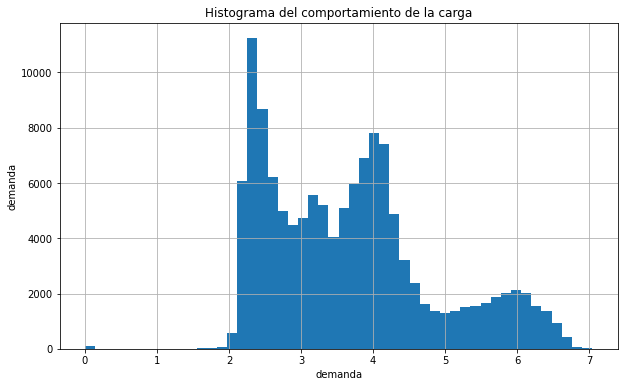

In [14]:
#hist=plt.hist(df_1[:] ,bins=50)
fig, hist = plt.subplots(1, 1, figsize=(10, 6))

df_1.hist(ax=hist, bins=50,legend=False)
hist.set_xlabel('demanda')
hist.set_ylabel('demanda')
hist.set_title('Histograma del comportamiento de la carga')

Se observa en el histograma que la serie temporal no sigue una distribución normal

In [15]:
df_1.describe()

,consumo
count,128544.000000
mean,3.681590
std,1.165581
min,0.000000
25%,2.650000
50%,3.590000
75%,4.250000
max,7.040000


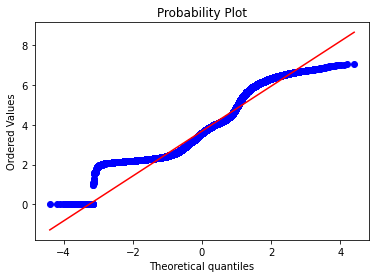

In [16]:
#Gráfica QQ
import scipy.stats as stats
import pylab
stats.probplot(df_1.consumo, dist="norm",plot=pylab  )
plt.show() 

GRAFICA QQ

La gráfica muestra si los datos se distribuyen de cierta manera, el gráfico muestra si los datos se ajustan a una distribución normal


##3.Analizando la serie de tiempo

###3.1Prueba de Dickey - Fuller de Estacionariedad
La prueba está basada en un contraste de hipótesis. Vamos a tener como 
hipótesis nula que la serie es No Estacionaria. Con lo cual la alternativa es 
que sí lo es.



El valor del estadístico se compara con un valor crítico en la tabla Dickey 
Fuller. Si el estadístico de prueba o de contraste es inferior al valor crítico 
rechazamos la hipótesis nula. Lo que significa que entonces los datos 
provienen de un proceso estacionario. 

Otra manera de llegar a estas conclusiones es a través del p-valor. El p-valor 
se puede interpretar como el valor que representa cuán probable es la 
hipótesis nula. Si es un valor muy cercano a cero significa que esa hipótesis 
es poco probable y habría que rechazarla. 


Contraste de Hipótesis

* $H_0:\varphi_1 =1 $; La serie no es estacionaria
* $H_1:\varphi_1 <1 $; La serie es estacionaria

* $\lambda_0$ : estadístico  de contraste

* $\lambda_0<\lambda_{crit} $ : Rechazamos :  $H_0$ --> serie estacionaria 

Otra manera es usar el p valor, cuan probable es la hipotesis nula
* si es un p-valor cercano a 0 --> hipotesis poco probable se rechaza

* $\alpha$ : nivel de significación 
* 1 - $\alpha$ : nivel de confiaza

p-valor < $\alpha$ : Rechazamos $H_0$ --> serie estacionaria



In [17]:
sts.adfuller(df_1.consumo)


(-49.784206265213484,
 0.0,
 72,
 128471,
 {'1%': -3.4304009019986195,
  '10%': -2.5667819748570873,
  '5%': -2.8615624979408527},
 -263429.5254934046)

Resultados :

* -49.78420626521365     --> Estadistico de constraste
* 0.0 --> p-valor
* 72
* 128471
* '1%': -3.4304009019986195 --> Nivel de significación, valor critico
* '10%': -2.5667819748570873
* '5%': -2.8615624979408527
* -263429.5254934046


$\lambda_0<\lambda_{crit} $ : Rechazamos :  $H_0$ --> serie estacionaria 

-49.78 $<$ -3.43  : Rechazamos :  $H_0$ --> serie estacionaria 


p-valor $<$ $\alpha$ : Rechazamos $H_0$ --> serie estacionaria

0 $<$  0.01 ó 0.1 ó  0.05 : Rechazamos $H_0$ --> serie estacionaria

Por lo que se concluye que la serie es estacionaria, esto quiere decir que  es estable a lo largo del tiempo, la media y la varianza son constantes y ademas no presenta tendencia


###3.2 Estacionalidad
La estacionalidad establece que ciertas tendencias aparecerán  de forma cíclica, existen varias formas de comprobar que existe estacionalidad, un enfoque es descomponer la serie en tres efectos:
- Tendencia : representa un patron consistente en los datos
- Estacional : representa los efectos ciclicos debido a la estacionalidad
- Residual : el error de prediccion



Tipos de desconposición
* Clásica : consiste en dos enfoques
1. Aditiva

  $X_t = U_t + S_t + E_t$
2. Multiplicativa

  $X_t =U_t .       S_t .  E_t $


**Descomposición Aditiva**





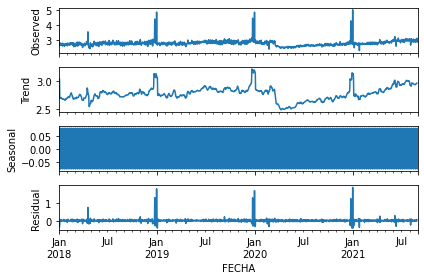

In [18]:
df_3 = df_1.copy()
df_3 = df_3.asfreq('d') # dataframe modificado cuidado!!!!!! arreglar
s_dec_additive = seasonal_decompose(df_3.consumo, model = "additive")


s_dec_additive.plot( )
plt.show()

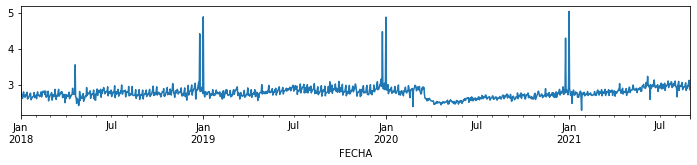

In [19]:
results = seasonal_decompose(df_3["consumo"])
results.observed.plot(figsize=(12,2))

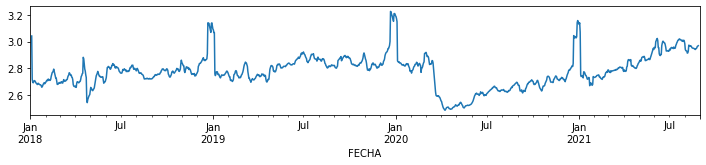

In [20]:
#tendencia
results.trend.plot(figsize=(12,2))

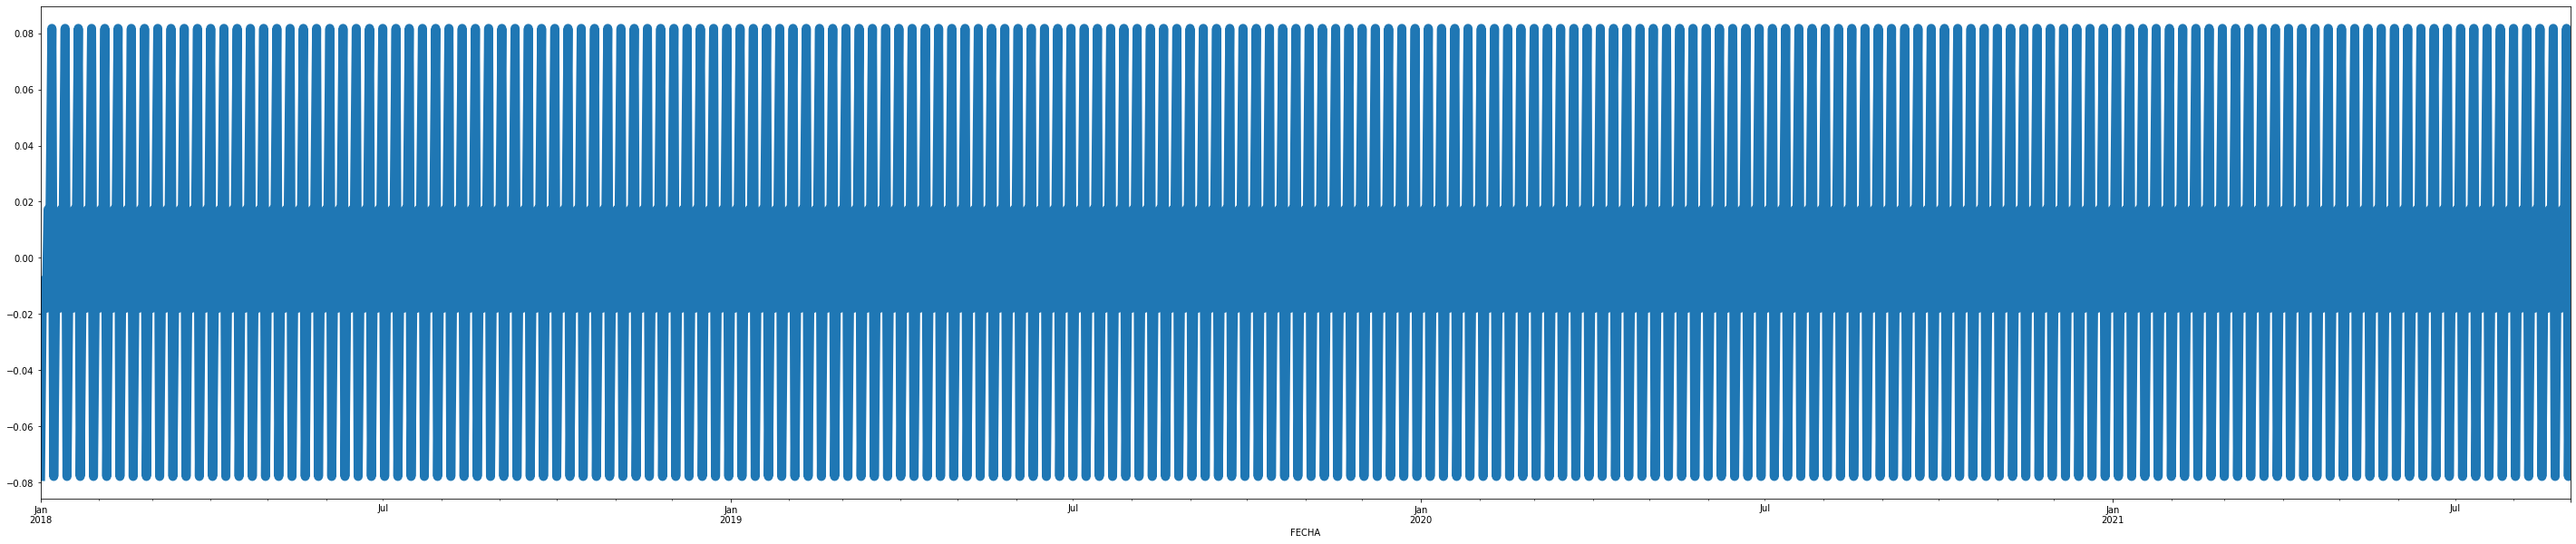

In [21]:
#estacionalidad
results.seasonal.plot(figsize=(50,10),linewidth=10 )

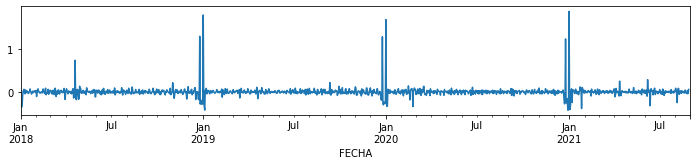

In [22]:
#residual
results.resid.plot(figsize=(12,2) )

##4. Reemplzando datos atipicos
Los valores perdidos al principio o fin de una serie de tiempo no suponen un problema especial; sencillamente acortan la longitud de la serie, en tanto que las discontinuidades que aparecen en la mitad de una serie (datos incrustados perdido) pueden ser problemas mucho más graves.

###4.1 Datos perdidos
Se encontraron 104 valores perdidos

#### Datos con valores "0"


In [23]:
df_1[df_1["consumo"] ==0]

,consumo
FECHA,
2018-04-15 07:30:00,0.0
2018-04-15 07:45:00,0.0
2018-04-15 08:00:00,0.0
2018-04-15 08:15:00,0.0
2018-04-15 08:30:00,0.0
...,...
2020-11-15 15:15:00,0.0
2020-11-15 15:30:00,0.0
2020-11-15 15:45:00,0.0


In [24]:
# Frame de valores cero
valoresCero =  pd.DataFrame( df_1[df_1["consumo"] ==0])

# Separar día y hora
valoresCero['fecha'] = valoresCero.index.normalize()
valoresCero['hora'] = valoresCero.index.time.astype(str)
# Tabla pivote de valores ceros

valoresCero_pivot = valoresCero.pivot(index='fecha', columns='hora', values='consumo')

valoresCero_pivot

hora,07:15:00,07:30:00,07:45:00,08:00:00,08:15:00,08:30:00,08:45:00,09:00:00,09:15:00,09:30:00,09:45:00,10:00:00,10:15:00,10:30:00,10:45:00,11:00:00,11:15:00,11:30:00,11:45:00,12:00:00,12:15:00,12:30:00,12:45:00,13:00:00,13:15:00,13:30:00,13:45:00,14:00:00,14:15:00,14:30:00,14:45:00,15:00:00,15:15:00,15:30:00,15:45:00,16:00:00,16:15:00,16:30:00,16:45:00,17:00:00
fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-15,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-15,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


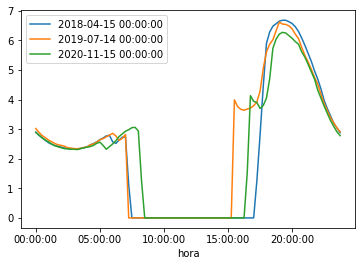

In [25]:
# Dias con valores "0", se puede observar el mismo comportamiento  posiblemente esas horas se realizo mantenimiento
df_pivot.loc["2018-04-15",:].plot()
df_pivot.loc["2019-07-14",:].plot()
df_pivot.loc["2020-11-15",:].plot()
plt.legend()

In [26]:
# Remplazando datos faltantes 
# 2018-04-15 domingo 
df_1.loc["2018-04-15 00:00:00":"2018-04-15 23:45:00" ] =np.array(df_pivot.loc["2018-04-08","00:00:00":"23:45:00"] ).reshape(96,1)
# 2019-07-14 domingo
df_1.loc["2019-07-14 00:00:00":"2019-07-14 23:45:00" ] =np.array(df_pivot.loc["2019-07-07","00:00:00":"23:45:00"] ).reshape(96,1)
# 2020-11-15 domingo
df_1.loc["2020-11-15 00:00:00":"2020-11-15 23:45:00" ] =np.array(df_pivot.loc["2020-11-08","00:00:00":"23:45:00"] ).reshape(96,1)

# Verificando se existen valores = 0
df_1[df_1["consumo"] ==0]


,consumo
FECHA,


###4.2 Datos atipicos
Tratamiento de datos atipicos, se procedera a ralizar un diagrama de cajas, metodo de los cuartiles.


####Diagrama de cajas
Se puede evidenciar que existen valores atipicos en los años 2018, 2019 y 2020

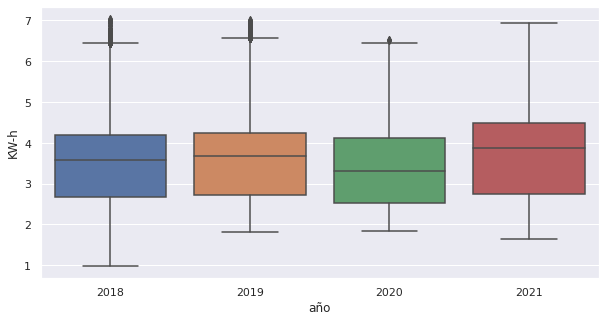

In [27]:
df_años = df_1.copy()
df_años["año"]=df_años.index.year
df_años = df_años.rename(columns={"consumo":"KW-h"})

sbn.set(rc={'figure.figsize':(10, 5)})
sbn.boxplot(data=df_años, x='año', y='KW-h')


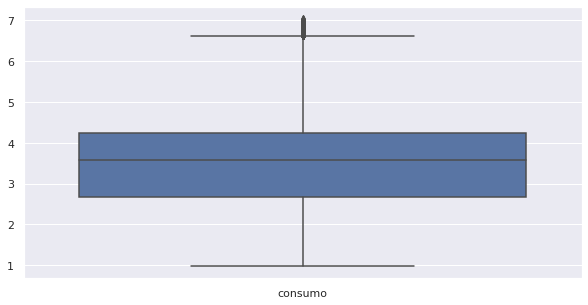

In [28]:
sbn.set(rc={'figure.figsize':(10, 5)})
sbn.boxplot(data=df_1)

In [29]:
Q1=df_1.quantile(0.25)
print("Primer Cuartil",Q1)

Q3 = df_1.quantile(0.75)
print("Terce Cuartil",Q3)

IQR = Q3-Q1
print("Rango Intercuartil",IQR)

mediana = df_1.median()
print("Mediana",mediana)

minimo = df_1.min()
print("Valor minimo",minimo)

maximo = df_1.max()
print("Valor máximo",maximo)

Primer Cuartil consumo    2.66
Name: 0.25, dtype: float64
Terce Cuartil consumo    4.25
Name: 0.75, dtype: float64
Rango Intercuartil consumo    1.59
dtype: float64
Mediana consumo    3.59
dtype: float64
Valor minimo consumo    0.98
dtype: float64
Valor máximo consumo    7.04
dtype: float64


In [30]:
df_1.describe()

,consumo
count,128544.000000
mean,3.683894
std,1.160781
min,0.980000
25%,2.660000
50%,3.590000
75%,4.250000
max,7.040000


In [31]:
#Calculo de los bigotes inferior y superior
BI_calculado=(Q1 - 0.5*IQR)    #0.38
print("BI calculado",BI_calculado)

BS_calculado=(Q3 + 1.5*IQR)   #6.45
print("BI calculado",BS_calculado)

BI calculado consumo    1.865
dtype: float64
BI calculado consumo    6.635
dtype: float64


In [32]:
atipicos = df_1[(df_1["consumo"] < float(BI_calculado) ) | (df_1["consumo"] > float(BS_calculado) )]
atipicos.sort_values("consumo")

,consumo
FECHA,
2018-08-12 08:45:00,0.98
2018-08-12 09:00:00,0.99
2018-08-12 09:30:00,1.04
2018-08-12 09:15:00,1.04
2018-08-12 10:00:00,1.06
...,...
2019-06-18 19:00:00,7.00
2019-06-27 19:15:00,7.01
2018-04-20 19:30:00,7.02


In [33]:
# no atipicos
# la suma de los datos atipicos y no-atipicos deber ser igual a la cantidad de datos del 2018 (510 + 128034 = 128544 ), lo cual se cumple
no_atipicos = df_1[(df_1["consumo"] >= float(BI_calculado) ) & (df_1["consumo"] <= float(BS_calculado) )]
no_atipicos

,consumo
FECHA,
2018-01-01 00:00:00,4.95
2018-01-01 00:15:00,4.95
2018-01-01 00:30:00,4.91
2018-01-01 00:45:00,4.78
2018-01-01 01:00:00,4.51
...,...
2021-08-31 22:45:00,4.06
2021-08-31 23:00:00,3.75
2021-08-31 23:15:00,3.48


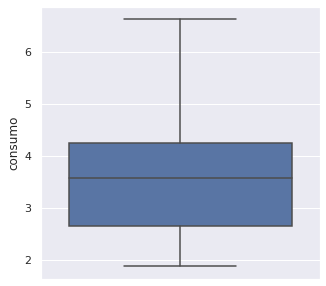

In [34]:
sbn.set(rc={'figure.figsize':(5, 5)})
sbn.boxplot(data=no_atipicos ,y="consumo")

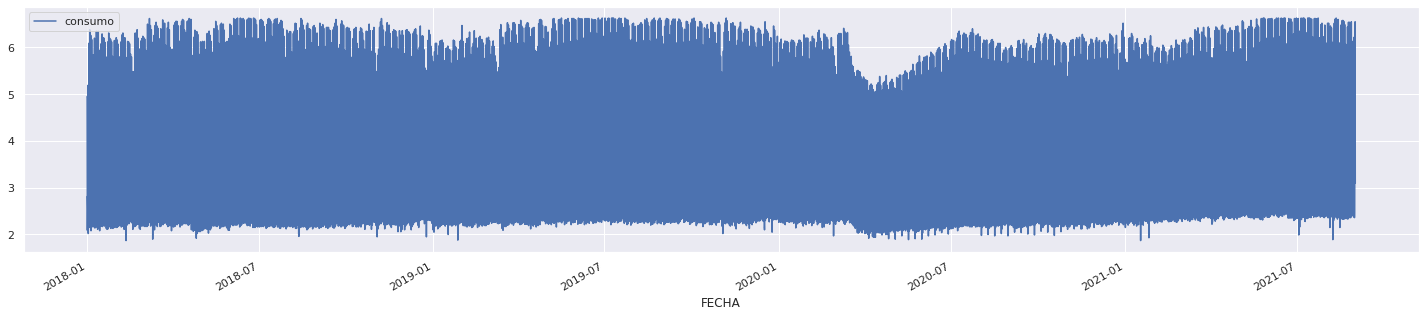

In [35]:
sbn.set(rc={'figure.figsize':(25, 5)})
no_atipicos.plot()

<function matplotlib.pyplot.show>

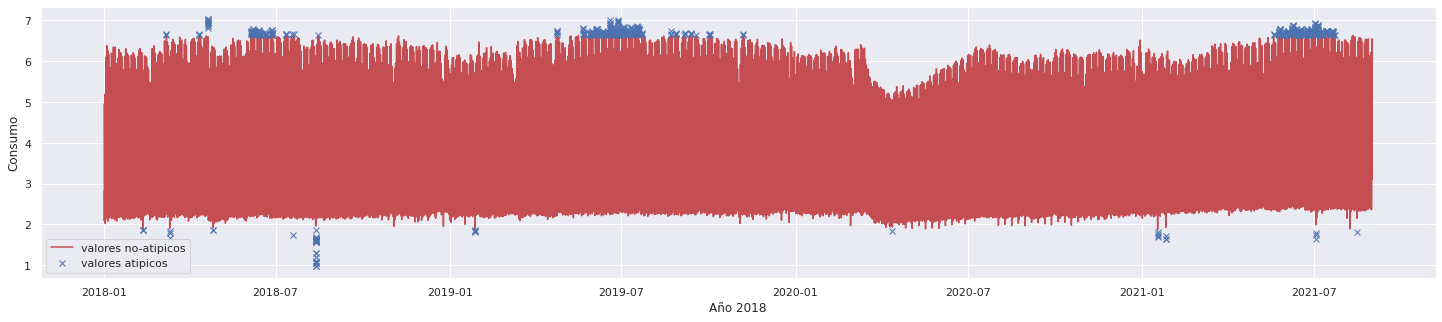

In [36]:
plt.plot( no_atipicos,'r',label="valores no-atipicos" )
plt.plot( atipicos,'bx',label="valores atipicos" )
plt.xlabel("Año 2018")
plt.ylabel('Consumo')
plt.legend()
plt.show

In [37]:
# Frame de valores atipicos
valoresAtipicos =  pd.DataFrame( atipicos)

# Separar día y hora
valoresAtipicos['fecha'] = valoresAtipicos.index.normalize()
valoresAtipicos['hora'] = valoresAtipicos.index.time.astype(str)
# Tabla pivote de valores ceros

valoresAtipicos_pivot = valoresAtipicos.pivot(index='fecha', columns='hora', values='consumo')
valoresAtipicos_pivot["2018"]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  # Remove the CWD from sys.path while we load stuff.


hora,02:30:00,02:45:00,03:00:00,06:00:00,06:15:00,06:30:00,06:45:00,07:00:00,07:15:00,07:30:00,07:45:00,08:30:00,08:45:00,09:00:00,09:15:00,09:30:00,09:45:00,10:00:00,10:15:00,10:30:00,10:45:00,11:00:00,11:15:00,11:30:00,11:45:00,12:00:00,12:15:00,12:30:00,12:45:00,13:00:00,13:15:00,13:30:00,13:45:00,14:00:00,14:15:00,14:30:00,14:45:00,15:00:00,15:15:00,16:15:00,18:00:00,18:15:00,18:30:00,18:45:00,19:00:00,19:15:00,19:30:00,19:45:00,20:00:00,20:15:00,20:30:00
fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-02-11,1.85,1.86,1.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.65,6.67,NaN,NaN,NaN,NaN,NaN
2018-03-11,NaN,NaN,NaN,NaN,NaN,1.67,1.78,1.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.64,6.67,6.64,NaN,NaN,NaN,NaN
2018-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.87,6.94,6.97,7.04,7.04,7.02,6.99,6.94,6.9,6.81
2018-04-26,NaN,NaN,NaN,1.85,1.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.71,6.75,6.69,6.67,NaN,NaN,NaN,NaN,NaN
2018-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.66,6.74,6.69,6.67,NaN,NaN,NaN,NaN,NaN
2018-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.70,6.79,6.79,6.73,6.68,NaN,NaN,NaN,NaN


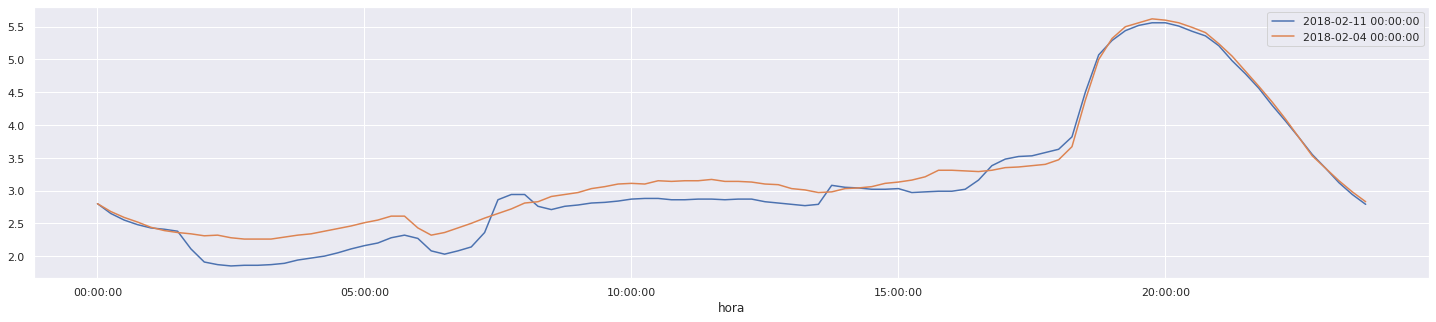

In [38]:
# verificando datos atipicos
# 2018-08-11
df_pivot.loc["2018-02-11"].plot( )
df_pivot.loc["2018-02-04"].plot() #dia semana anterior anterior
plt.legend()

In [39]:
#Remplazando valores
df_1.loc["2018-02-11 00:00:00":"2018-02-11 23:45:00" ] =np.array(df_pivot.loc["2018-02-04","00:00:00":"23:45:00"] ).reshape(96,1)


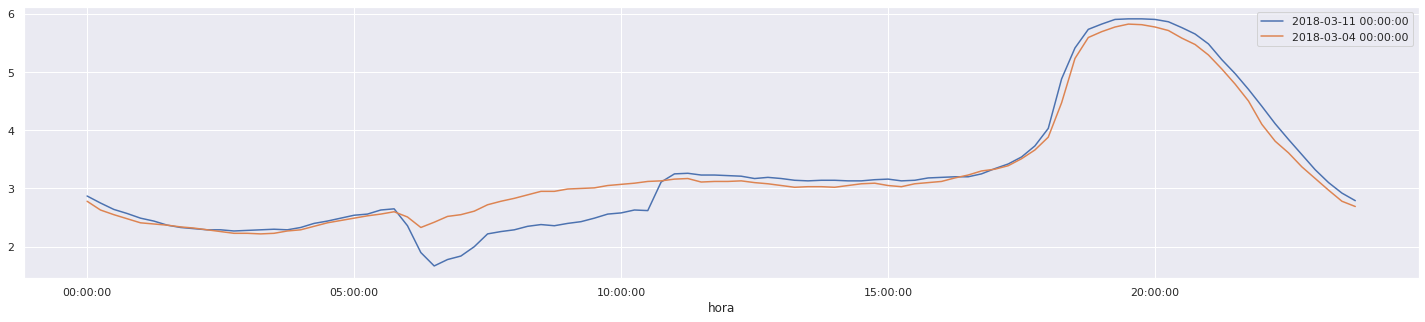

In [40]:
# verificando datos atipicos
# 2018-03-11
df_pivot.loc["2018-03-11"].plot( )
df_pivot.loc["2018-03-04"].plot() #dia semana  anterior
plt.legend()

In [41]:
#Remplazando valores
df_1.loc["2018-03-11 00:00:00":"2018-03-11 23:45:00" ] =np.array(df_pivot.loc["2018-03-04","00:00:00":"23:45:00"] ).reshape(96,1)


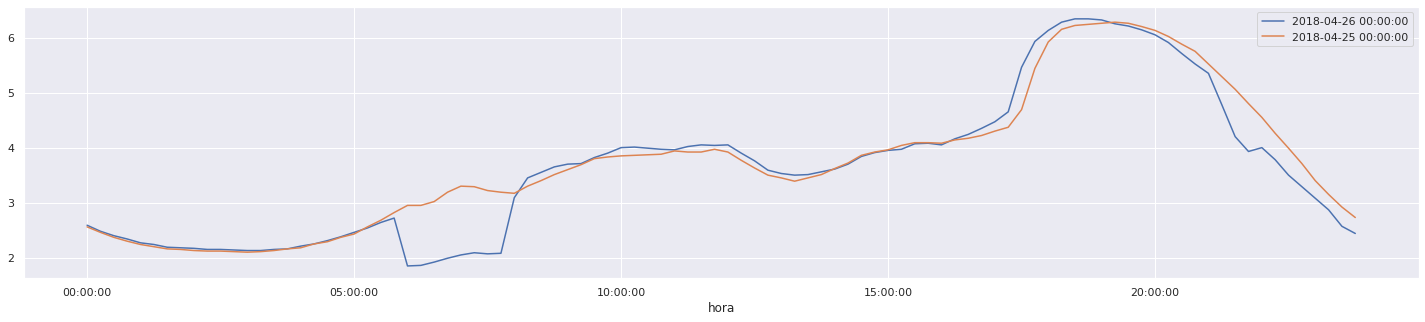

In [42]:
# verificando datos atipicos
# 2018-04-26
df_pivot.loc["2018-04-26"].plot( )
df_pivot.loc["2018-04-25"].plot() #dia anterior
plt.legend()

In [43]:
#Remplazando valores
df_1.loc["2018-04-26 00:00:00":"2018-04-26 23:45:00" ] =np.array(df_pivot.loc["2018-04-25","00:00:00":"23:45:00"] ).reshape(96,1)


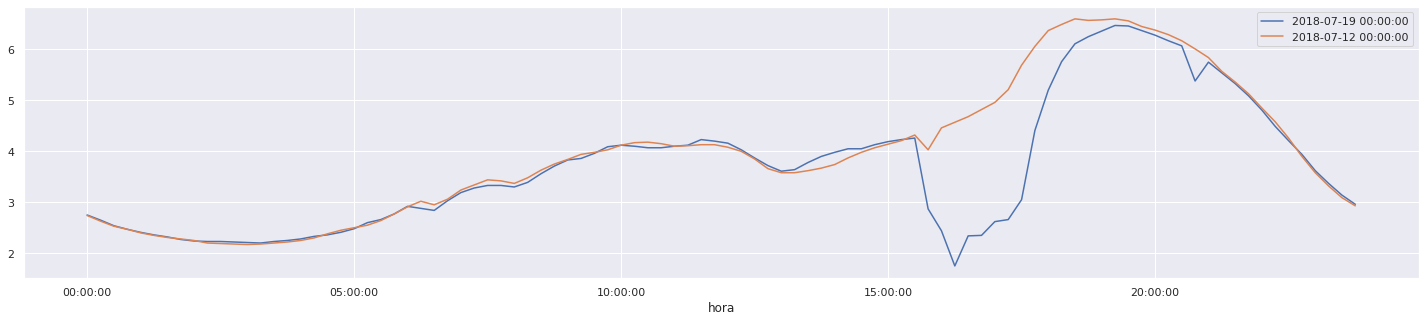

In [44]:
#verificando datos atipicos
# 2018-07-19
df_pivot.loc["2018-07-19"].plot( )
df_pivot.loc["2018-07-12"].plot() #dia semana anterior
plt.legend()

In [45]:
#Remplazando valores
df_1.loc["2018-07-19 00:00:00":"2018-07-19 23:45:00" ] =np.array(df_pivot.loc["2018-07-12","00:00:00":"23:45:00"] ).reshape(96,1)

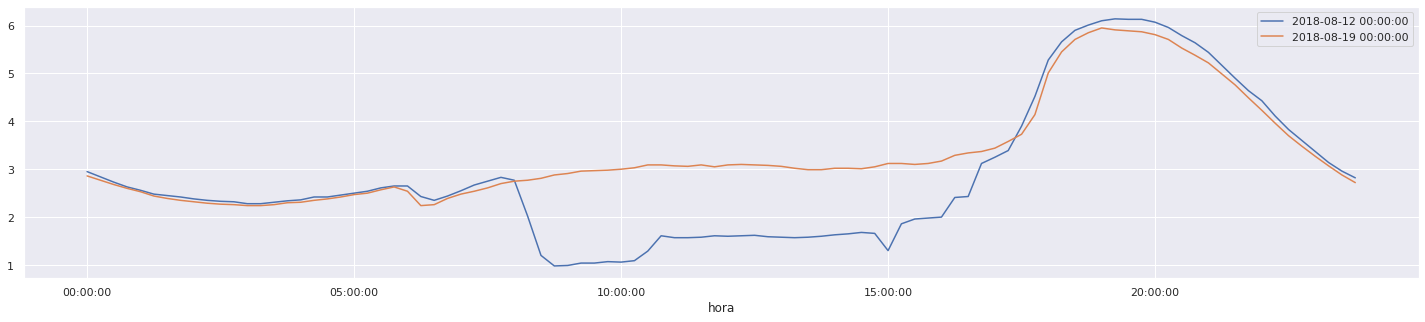

In [46]:
#verificando datos atipicos
# 2018-08-12
df_pivot.loc["2018-08-12"].plot( )
df_pivot.loc["2018-08-19"].plot() #dia semana siguiente
plt.legend()

In [47]:
#Remplazando valores
df_1.loc["2018-08-12 00:00:00":"2018-08-12 23:45:00" ] =np.array(df_pivot.loc["2018-08-19","00:00:00":"23:45:00"] ).reshape(96,1)

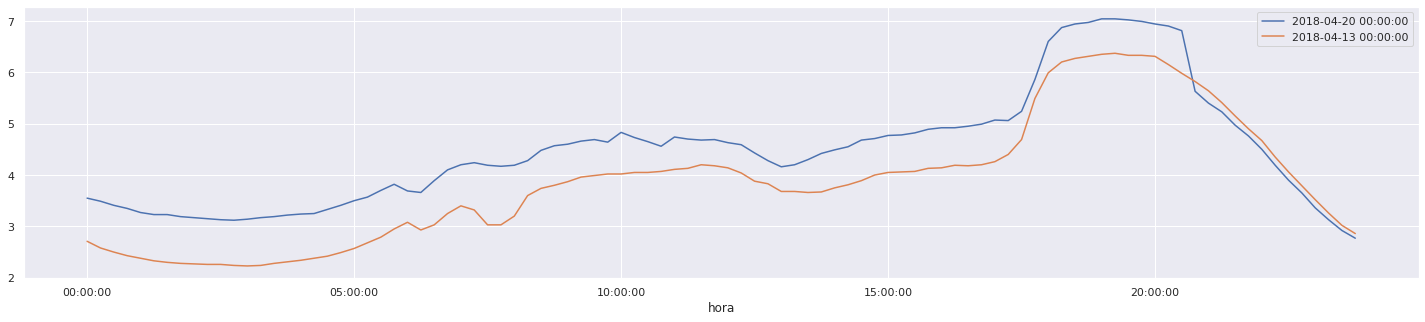

In [48]:
#verificando datos atipicos
# 2018-04-20
df_pivot.loc["2018-04-20"].plot( )
df_pivot.loc["2018-04-13"].plot() #dia semana anterior
plt.legend()

In [49]:
#Remplazando valores picos
df_1.loc["2018-04-20 00:00:00":"2018-04-20 23:45:00" ] =np.array(df_pivot.loc["2018-04-13","00:00:00":"23:45:00"] ).reshape(96,1)

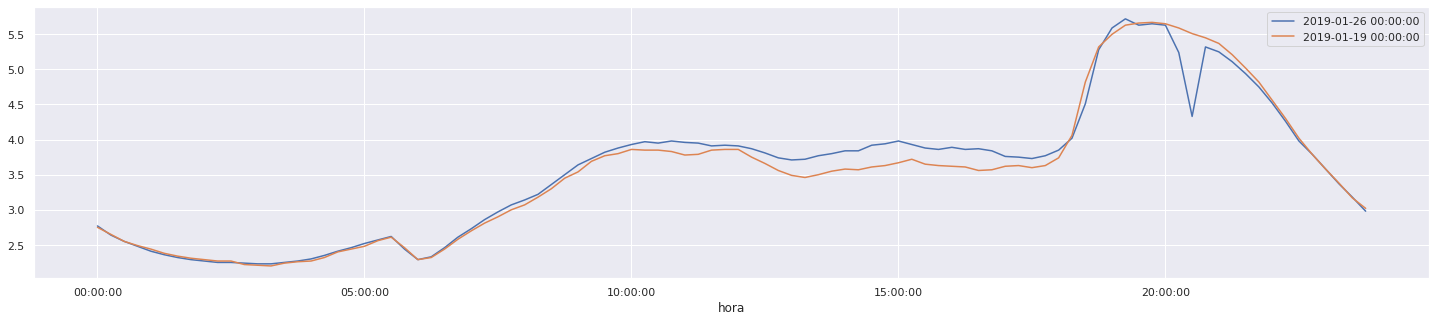

In [50]:
#verificando datos atipicos
# 2019-01-26
df_pivot.loc["2019-01-26"].plot( )
df_pivot.loc["2019-01-19"].plot() #dia semana anterior
plt.legend()

In [51]:
#Remplazando valores picos
df_1.loc["2019-01-26 00:00:00":"2019-01-26 23:45:00" ] =np.array(df_pivot.loc["2019-01-19","00:00:00":"23:45:00"] ).reshape(96,1)

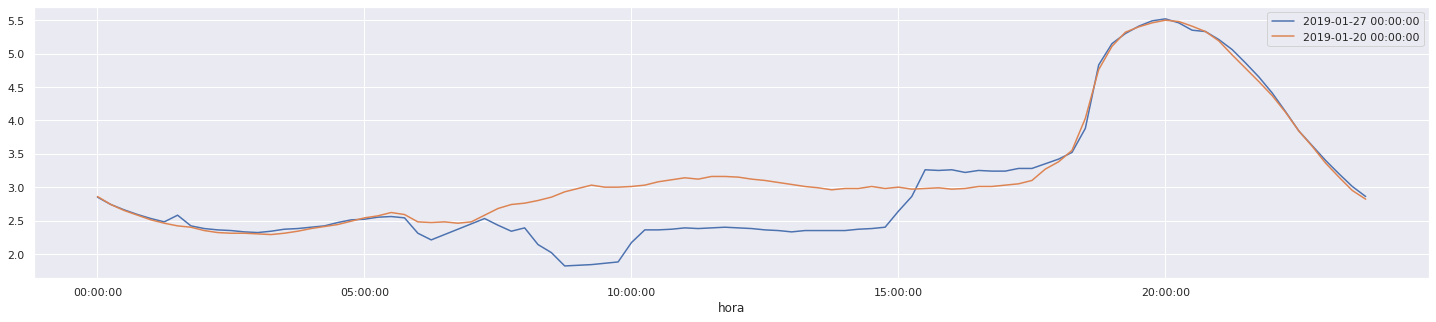

In [52]:
#verificando datos atipicos
# 2019-01-27
df_pivot.loc["2019-01-27"].plot( )
df_pivot.loc["2019-01-20"].plot() #dia semana anterior
plt.legend()

In [53]:
#Remplazando valores picos
df_1.loc["2019-01-27 00:00:00":"2019-01-27 23:45:00" ] =np.array(df_pivot.loc["2019-01-20","00:00:00":"23:45:00"] ).reshape(96,1)

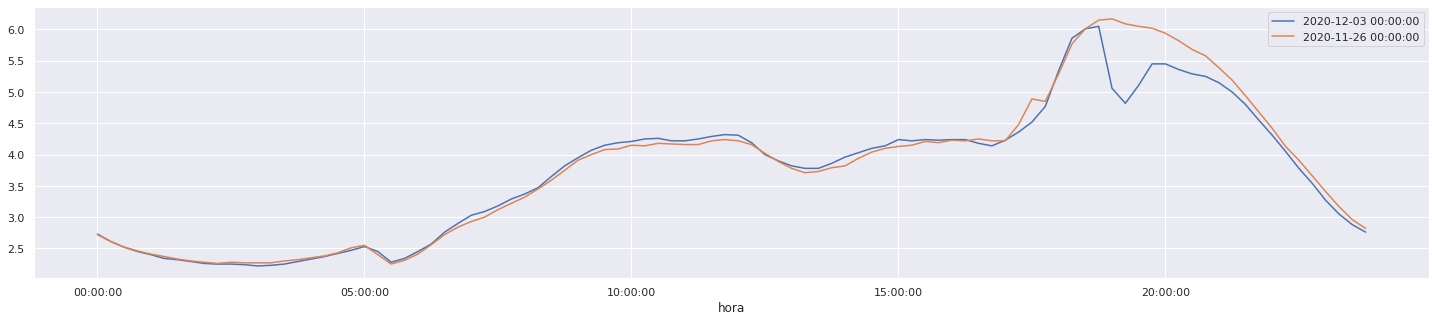

In [54]:
#verificando datos atipicos
# 2020-12-03              
df_pivot.loc["2020-12-03"].plot( )
df_pivot.loc["2020-11-26"].plot() #dia semana anterior
plt.legend()

In [55]:
#Remplazando valores picos
df_1.loc["2020-12-03 00:00:00":"2020-12-03 23:45:00" ] =np.array(df_pivot.loc["2020-11-26","00:00:00":"23:45:00"] ).reshape(96,1)

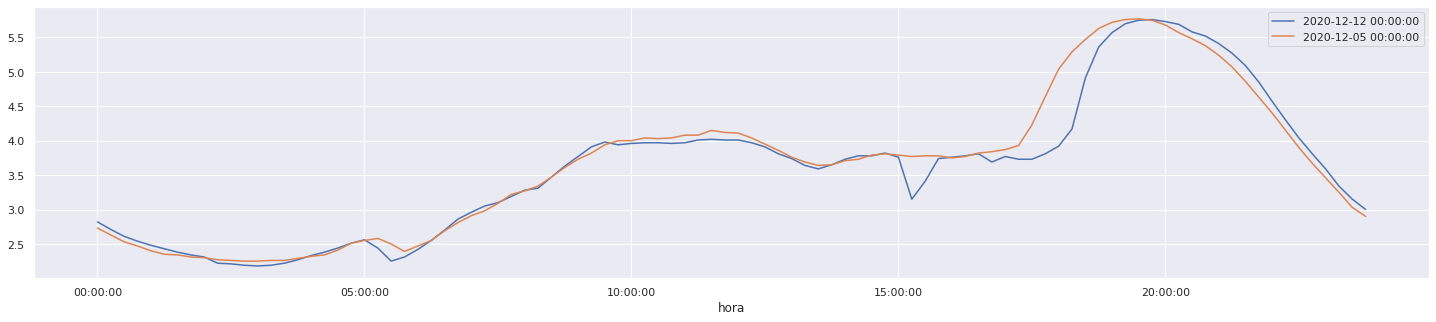

In [56]:
#verificando datos atipicos
# 2020-12-03              
df_pivot.loc["2020-12-12"].plot( )
df_pivot.loc["2020-12-05"].plot() #dia semana anterior
plt.legend()

In [57]:
#Remplazando valores 
df_1.loc["2020-12-12 00:00:00":"2020-12-12 23:45:00" ] =np.array(df_pivot.loc["2020-12-05","00:00:00":"23:45:00"] ).reshape(96,1)

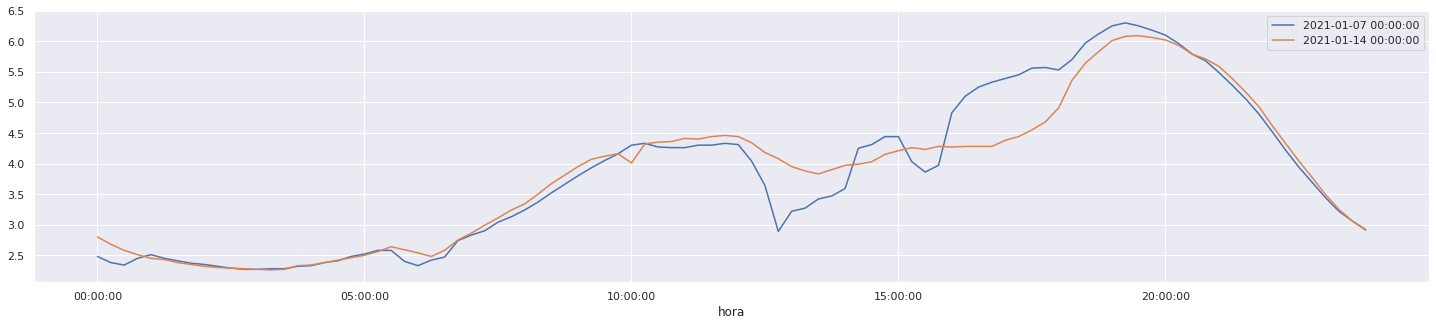

In [58]:
#verificando datos atipicos
# 2021-01-07              
df_pivot.loc["2021-01-07"].plot( )
df_pivot.loc["2021-01-14"].plot() #dia semana anterior
plt.legend()

In [59]:
#Remplazando valores 
df_1.loc["2021-01-07 00:00:00":"2021-01-07 23:45:00" ] =np.array(df_pivot.loc["2021-01-14","00:00:00":"23:45:00"] ).reshape(96,1)

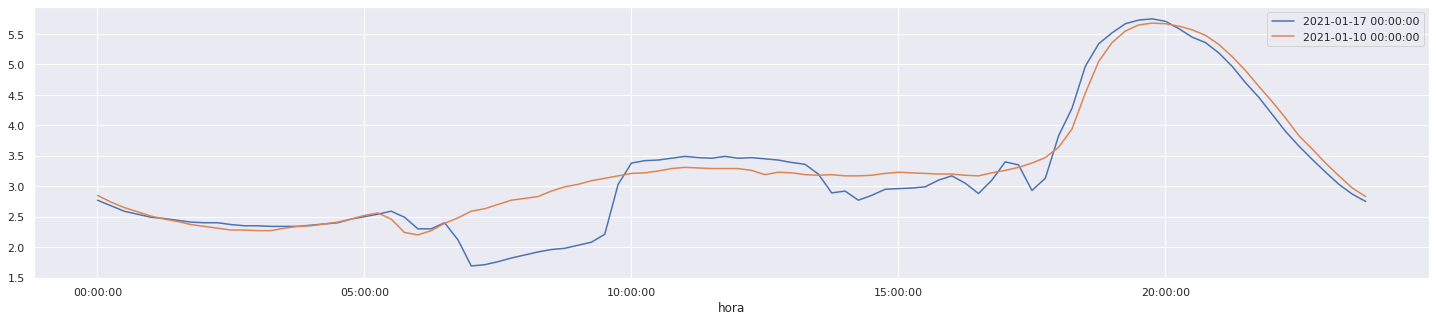

In [60]:
#verificando datos atipicos
# 2021-01-17              
df_pivot.loc["2021-01-17"].plot( )
df_pivot.loc["2021-01-10"].plot() #dia semana anterior
plt.legend()

In [61]:
#Remplazando valores 
df_1.loc["2021-01-17 00:00:00":"2021-01-17 23:45:00" ] =np.array(df_pivot.loc["2021-01-10","00:00:00":"23:45:00"] ).reshape(96,1)

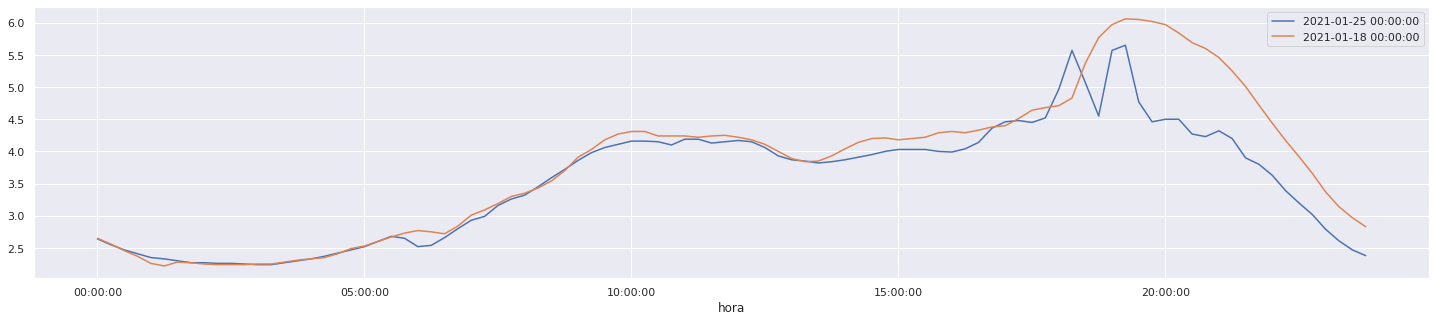

In [62]:
#verificando datos atipicos
# 2021-01-25              
df_pivot.loc["2021-01-25"].plot( )
df_pivot.loc["2021-01-18"].plot() #dia semana anterior
plt.legend()

In [63]:
#Remplazando valores 
df_1.loc["2021-01-25 00:00:00":"2021-01-25 23:45:00" ] =np.array(df_pivot.loc["2021-01-18","00:00:00":"23:45:00"] ).reshape(96,1)

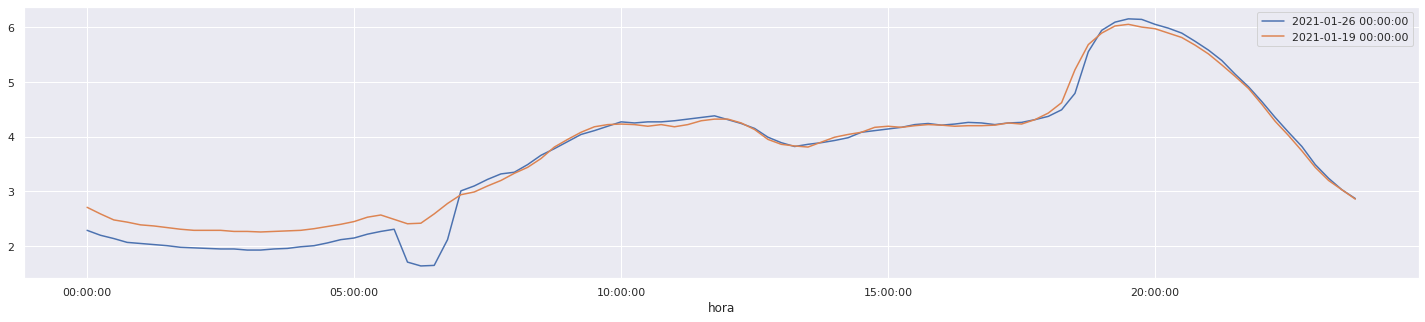

In [64]:
#verificando datos atipicos
# 2021-01-26            
df_pivot.loc["2021-01-26"].plot( )
df_pivot.loc["2021-01-19"].plot() #dia semana anterior
plt.legend()

In [65]:
#Remplazando valores 
df_1.loc["2021-01-26 00:00:00":"2021-01-26 23:45:00" ] =np.array(df_pivot.loc["2021-01-19","00:00:00":"23:45:00"] ).reshape(96,1)

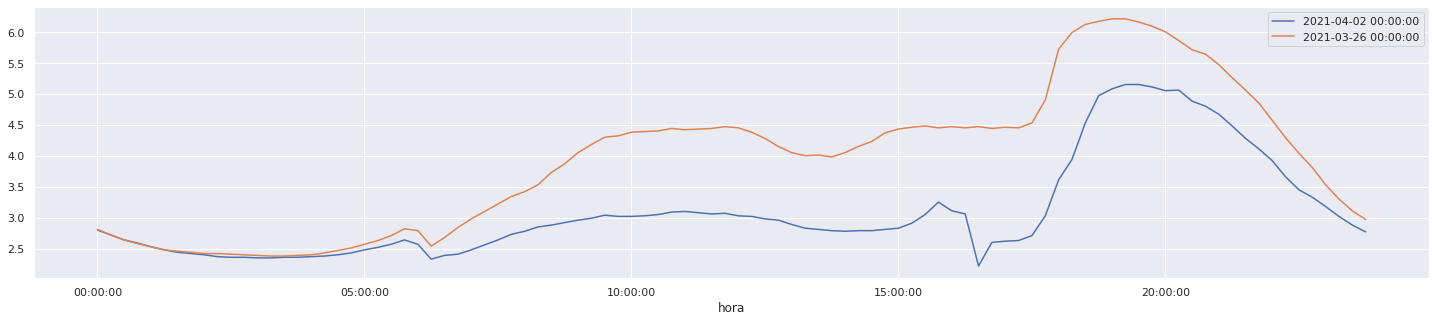

In [66]:
#verificando datos atipicos
# 2021-04-02           
df_pivot.loc["2021-04-02"].plot( )
df_pivot.loc["2021-03-26"].plot() #dia semana anterior
plt.legend()

In [67]:
#Remplazando valores 
df_1.loc["2021-04-02 00:00:00":"2021-04-02 23:45:00" ] =np.array(df_pivot.loc["2021-03-26","00:00:00":"23:45:00"] ).reshape(96,1)

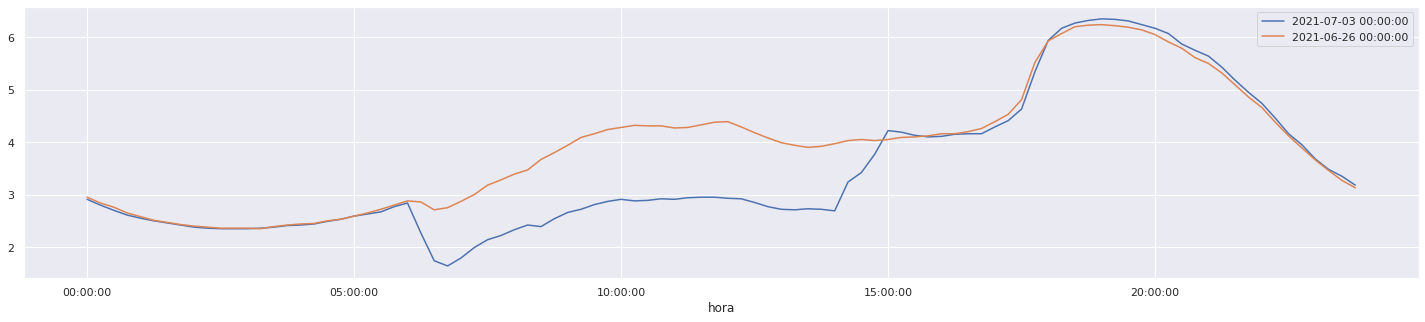

In [68]:
#verificando datos atipicos
# 2021-07-03           
df_pivot.loc["2021-07-03"].plot( )
df_pivot.loc["2021-06-26"].plot() #dia semana anterior
plt.legend()

In [69]:
#Remplazando valores 
df_1.loc["2021-07-03 00:00:00":"2021-07-03 23:45:00" ] =np.array(df_pivot.loc["2021-06-26","00:00:00":"23:45:00"] ).reshape(96,1)

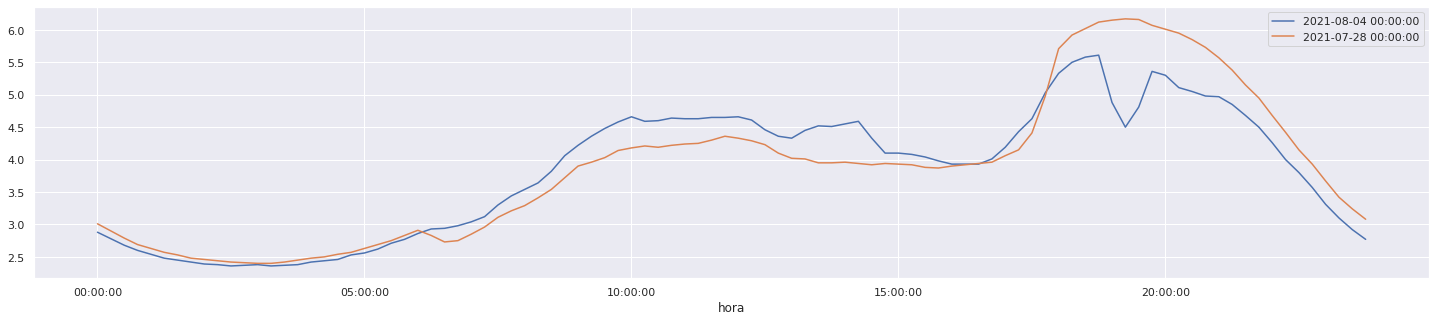

In [70]:
#verificando datos atipicos
# 2021-08-04           
df_pivot.loc["2021-08-04"].plot( )
df_pivot.loc["2021-07-28"].plot() #dia semana anterior
plt.legend()

In [71]:
#Remplazando valores 
df_1.loc["2021-08-04 00:00:00":"2021-08-04 23:45:00" ] =np.array(df_pivot.loc["2021-07-28","00:00:00":"23:45:00"] ).reshape(96,1)

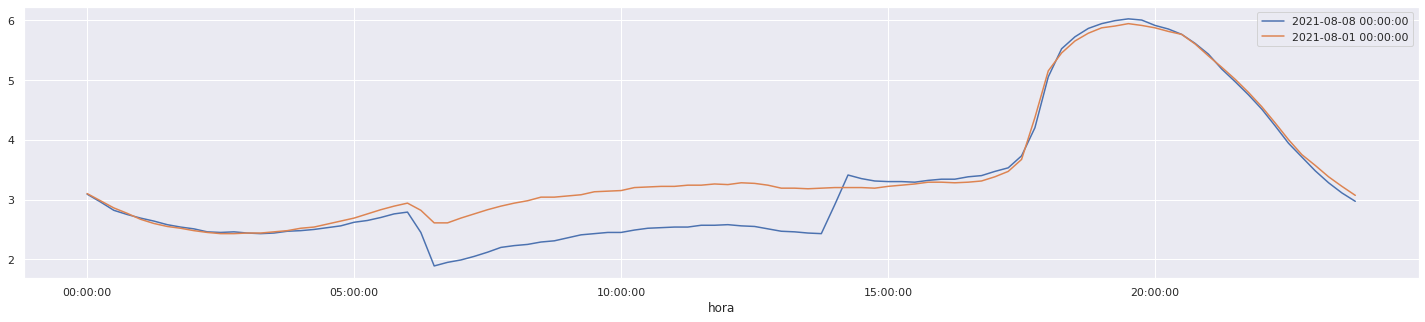

In [72]:
#verificando datos atipicos
# 2021-08-08           
df_pivot.loc["2021-08-08"].plot( )
df_pivot.loc["2021-08-01"].plot() #dia semana anterior
plt.legend()

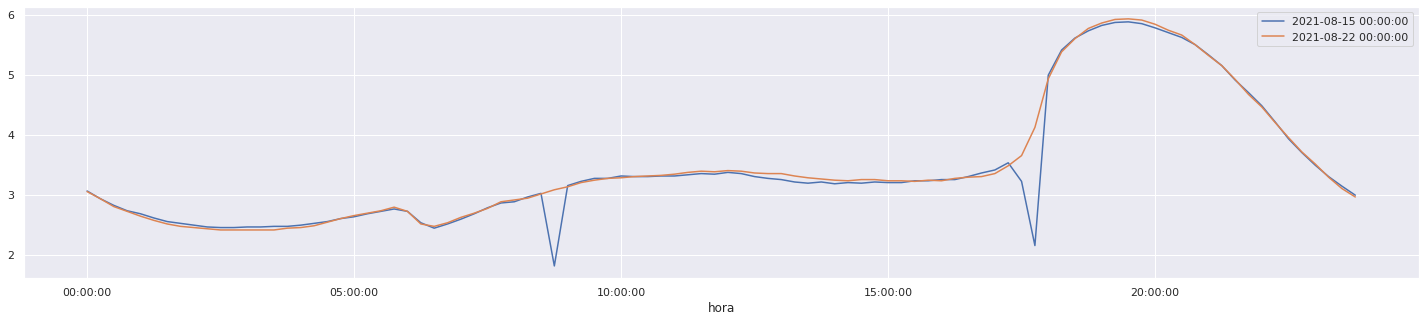

In [73]:
#verificando datos atipicos
# 2021-08-15          
df_pivot.loc["2021-08-15"].plot( )
df_pivot.loc["2021-08-22"].plot() #dia semana anterior
plt.legend()

In [74]:
#Remplazando valores 
df_1.loc["2021-08-15 00:00:00":"2021-08-15 23:45:00" ] =np.array(df_pivot.loc["2021-08-22","00:00:00":"23:45:00"] ).reshape(96,1)

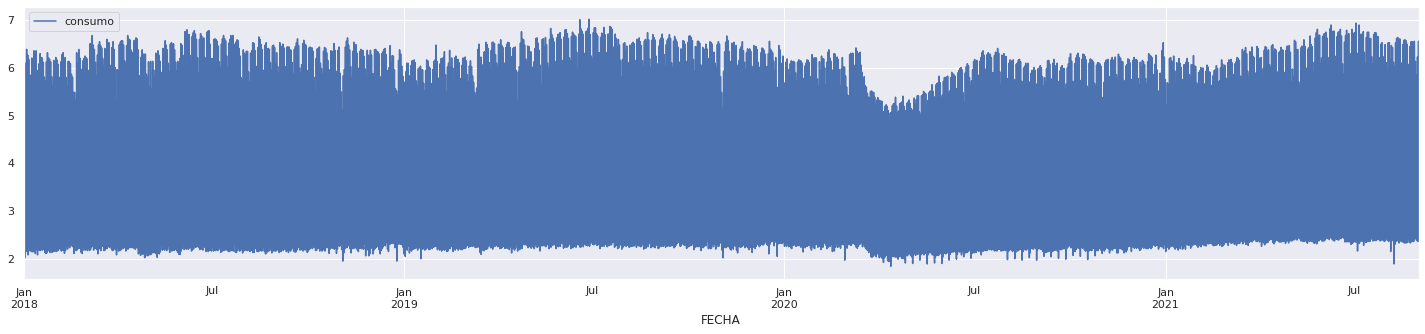

In [75]:
# data prosesada
df_1.plot()
#df_1.loc["2021-08-01":"2021-08-31"].plot()

In [76]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df_1.head()

,consumo
FECHA,
2018-01-01 00:00:00,4.95
2018-01-01 00:15:00,4.95
2018-01-01 00:30:00,4.91
2018-01-01 00:45:00,4.78
2018-01-01 01:00:00,4.51


#Exportando datos procesados

In [77]:
#exportando dataframe para realizar la red neuronal
df_1.to_excel("juliaca_10kv_ultimo.xlsx")


#Suavisado

In [78]:
df_1['TESadd96'] = ExponentialSmoothing(df_1['consumo'],trend='add',seasonal='add',seasonal_periods=96).fit().fittedvalues
df_1.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,consumo,TESadd96
FECHA,,
2018-01-01 00:00:00,4.95,4.291211
2018-01-01 00:15:00,4.95,4.652719
2018-01-01 00:30:00,4.91,4.777109
2018-01-01 00:45:00,4.78,4.715007
2018-01-01 01:00:00,4.51,4.466367


In [95]:
df_1['TESmul96'] = ExponentialSmoothing(df_1['consumo'],trend='mul',seasonal='mul',seasonal_periods=96).fit().fittedvalues
df_1.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:863: RuntimeWarning: overflow encountered in multiply
  (alphac * trended(lvls[i - 1], dampen(b[i - 1], phi)))
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:867: RuntimeWarning: overflow encountered in multiply
  s[i + m - 1] = y_gamma[i - 1] / trended(lvls[i - 1], dampen(b[i - 1], phi)) + \
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:865: RuntimeWarning: invalid value encountered in true_divide
  b[i] = (beta * detrend(lvls[i], lvls[i - 1])) + \
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:875: RuntimeWarning: overflow encountered in multiply
  trend = trended(lvls, b)


,consumo,TESadd96,TESmul96,SMA
FECHA,,,,
2018-01-01 00:00:00,4.95,4.291211,4.954688,NaN
2018-01-01 00:15:00,4.95,4.652719,4.959121,NaN
2018-01-01 00:30:00,4.91,4.777109,4.923191,NaN
2018-01-01 00:45:00,4.78,4.715007,4.796632,NaN
2018-01-01 01:00:00,4.51,4.466367,4.529040,NaN


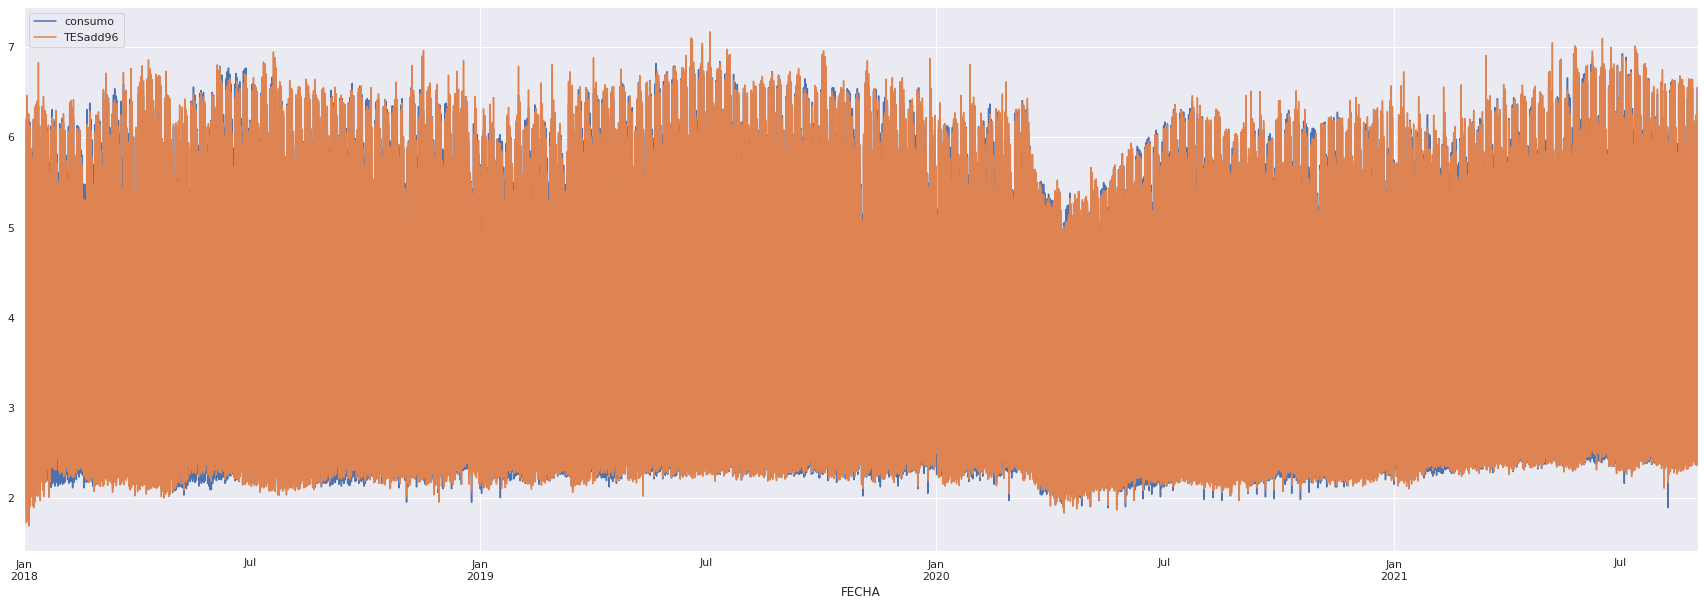

In [96]:
df_1[['consumo','TESadd96']].plot(figsize=(30,10))